# 0. Imports

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, matthews_corrcoef, accuracy_score, ConfusionMatrixDisplay
import monke_features as mf
import monke_classify as mc
import monke_io as mio
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os.path as path

In [2]:
# KOI
names_koi = ["koi_apr11", "koi_apr17", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_5", "koi_apr25_6"]

pose_data_koi = mio.read_poses(names_koi)
tremors_raw = mio.read_tremors_multi(names_koi)
labels_koi = {}

for name in tremors_raw:
    labels_koi[name] = mf.generate_labelled_frames(pose_data_koi[name], tremors_raw[name])

# BOBA
names_boba = ["boba_apr11", "boba_apr21", "boba_apr21_2", "boba_apr25", "boba_apr25_2"]

pose_data_boba = mio.read_poses(names_boba)
tremors_raw = mio.read_tremors_multi(names_boba)
labels_boba = {}

for name in tremors_raw:
    labels_boba[name] = mf.generate_labelled_frames(pose_data_boba[name], tremors_raw[name])

# BANDUNG
names_bandung = ["bandung_mar27", "bandung_mar27_2", "bandung_mar27_3", "bandung_may19_2"]

pose_data_bandung = mio.read_poses(names_bandung)
tremors_raw = mio.read_tremors_multi(names_bandung)
labels_bandung = {}

for name in tremors_raw:
    labels_bandung[name] = mf.generate_labelled_frames(pose_data_bandung[name], tremors_raw[name])

# HORLICKS
names_horlicks = ["horlicks_apr12", "horlicks_may2", "horlicks_jun16"]

pose_data_horlicks = mio.read_poses(names_horlicks)
tremors_raw = mio.read_tremors_multi(names_horlicks)
labels_horlicks = {}

for name in tremors_raw:
    labels_horlicks[name] = mf.generate_labelled_frames(pose_data_horlicks[name], tremors_raw[name])
    
# BRIYANI
names_briyani = ["briyani_apr12", "briyani_may19", "briyani_jun16"]

pose_data_briyani = mio.read_poses(names_briyani)
tremors_raw = mio.read_tremors_multi(names_briyani)
labels_briyani = {}

for name in tremors_raw:
    labels_briyani[name] = mf.generate_labelled_frames(pose_data_briyani[name], tremors_raw[name])
    
# TUTU KUEH
names_tutukueh = ["tutukueh_apr21", "tutukueh_may2", "tutukueh_jun15"]

pose_data_tutukueh = mio.read_poses(names_tutukueh)
tremors_raw = mio.read_tremors_multi(names_tutukueh)
labels_tutukueh = {}

for name in tremors_raw:
    labels_tutukueh[name] = mf.generate_labelled_frames(pose_data_tutukueh[name], tremors_raw[name])

# ALL
names_all = {"koi":names_koi, "boba":names_boba, "bandung":names_bandung, 
             "horlicks":names_horlicks, "briyani":names_briyani, "tutukueh":names_tutukueh}
pose_data_all = {"koi":pose_data_koi, "boba":pose_data_boba, "bandung":pose_data_bandung, 
             "horlicks":pose_data_horlicks, "briyani":pose_data_briyani, "tutukueh":pose_data_tutukueh}
labels_all = {"koi":labels_koi, "boba":labels_boba, "bandung":labels_bandung, 
             "horlicks":labels_horlicks, "briyani":labels_briyani, "tutukueh":labels_tutukueh}

In [125]:
process = lambda x : mf.changes_in_changes(mf.vel(x), 10, 0.1)

processed_koi_data, processed_koi_labels = mc.process_data(pose_data_koi, labels_koi, process)
print('Koi done!')
processed_boba_data, processed_boba_labels = mc.process_data(pose_data_boba, labels_boba, process)
print('Boba done!')
processed_bandung_data, processed_bandung_labels = mc.process_data(pose_data_bandung, labels_bandung, process)
print('Bandung done!')
processed_horlicks_data, processed_horlicks_labels = mc.process_data(pose_data_horlicks, labels_horlicks, process)
print('Horlicks done!')
processed_briyani_data, processed_briyani_labels = mc.process_data(pose_data_briyani, labels_briyani, process)
print('Briyani done!')
processed_tutukueh_data, processed_tutukueh_labels = mc.process_data(pose_data_tutukueh, labels_tutukueh, process)
print('Tutukueh done!')
print('All done!')
# training_data, testing_data, training_labels, testing_labels = prep_multi_train_test_data(processed_data, processed_labels, names_all)

Koi done!
Boba done!
Bandung done!
Horlicks done!
Briyani done!
Tutukueh done!
All done!


In [245]:
def pool_and_take_out(processed_train_data, processed_train_labels, train_names, test_names, train_size=None, test_size=0.2, processed_test_data=None, processed_test_labels=None):
    
    if test_size > 1 or test_size < 0:
        raise ValueError("Test size must be between 0 to 1")
    if train_size > 1 or train_size < 0:
        raise ValueError("Train size must be between 0 to 1")
    if train_size == None:
        train_size = 1 - test_size

    if processed_test_labels == None:
        processed_test_labels = processed_train_labels
    if processed_test_data == None:
        processed_test_data = processed_train_data
    
    all_train_data_1_1 = np.empty((0,51))
    all_train_labels_1_1 = []
    all_test_data_1_1 = np.empty((0,51))
    all_test_labels_1_1 = []

    for name in train_names:
        all_train_data_1_1 = np.concatenate((all_train_data_1_1, processed_train_data[name]))
        all_train_labels_1_1 = np.concatenate((all_train_labels_1_1, processed_train_labels[name]))
    for name in test_names:
        all_test_data_1_1 = np.concatenate((all_test_data_1_1, processed_test_data[name]))
        all_test_labels_1_1 = np.concatenate((all_test_labels_1_1, processed_test_labels[name]))

    
    all_train_data_and_labels = np.column_stack((all_train_data_1_1, all_train_labels_1_1))
    all_test_data_and_labels = np.column_stack((all_test_data_1_1, all_test_labels_1_1))
    
    rng = np.random.default_rng()

    combined_train_data_1_1 = []
    combined_train_labels_1_1 = []
    combined_test_data_1_1 = []
    combined_test_labels_1_1 = []
    #print(all_train_data_and_labels)
    train_percent = int(len(all_train_data_and_labels) * train_size)
    test_percent = int(len(all_test_data_and_labels) * test_size)

    sampled_train = rng.choice(all_train_data_and_labels, size=train_percent, replace=False).astype(int)
    sampled_test = rng.choice(all_test_data_and_labels, size=test_percent, replace=False).astype(int)
    

    print(f'Length of sampled_train is {len(sampled_train)} and Length of sampled_test is {len(sampled_test)}')
    sampled_train_data = sampled_train[:, :-1]
    sampled_train_labels = sampled_train[:, -1]
    sampled_test_data = sampled_test[:, :-1]
    sampled_test_labels = sampled_test[:, -1]

    return sampled_train_data, sampled_test_data, sampled_train_labels, sampled_test_labels

# Steps

## 1. Test on Other Koi Video (koi_apr11), 10 minutes and 2 minutes.

In [124]:
process = lambda x : mf.changes_in_changes(mf.vel(x), 10, 0.1)

processed_koi_data, processed_koi_labels = mc.process_data(pose_data_koi, labels_koi, process)
# training_data, testing_data, training_labels, testing_labels = prep_multi_train_test_data(processed_data, processed_labels, names_all)

In [36]:
len(processed_koi_labels['koi_apr25_6'])

1887

In [16]:
for i in processed_koi_data.values():
    print(len(i))

18925
18295
20447
18593
2344
21229
1887


In [42]:
np.concatenate((np.empty((0, 51)), processed_koi_data["koi_apr25_6"]))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 2., 4., ..., 0., 0., 1.],
       [0., 2., 4., ..., 0., 0., 1.],
       [0., 1., 3., ..., 0., 0., 2.]])

In [246]:
combined_train_1_1 = ["koi_apr17", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_6"]
test_1_1 = ['koi_apr11']
test_names_1_1 = ['20per_1_1', '100per_1_1']
train_names_1_1 = ["20_1_1", "40_1_1", "60_1_1", "80_1_1", "100_1_1"]
test_sizes_1_1 = [0.2, 0.99999999]
train_sizes_1_1 = [0.2, 0.4, 0.6, 0.8, 0.99999999]
#test_length_1_1 = np.array(test_sizes_1_1) * len(processed_koi_data['koi_apr11'])
#train_length_1_1 = np.array(train_sizes_1_1) * len(all_train_data)
test_length_1_1 = test_length_1_1.astype(int)
train_length_1_1 = train_length_1_1.astype(int)
clf = RandomForestClassifier(class_weight="balanced_subsample")

results_1_1 = []

for i in range(5):
    results_1_1.append({})
    for j in range(2):
        results_1_1[i][test_names_1_1[j]] = []
        training_data, test_data, training_labels, test_labels = pool_and_take_out(processed_koi_data, processed_koi_labels, train_names=combined_train_1_1, test_names=test_1_1, test_size=test_sizes_1_1[j] ,train_size=train_sizes_1_1[i])
        clf.fit(training_data, training_labels)
        print((i, j))
        results_1_1[i][test_names_1_1[j]].append(mc.test_classify(clf, test_data, test_labels))

Length of sampled_train is 12313 and Length of sampled_test is 3785
(0, 0)
Length of sampled_train is 12313 and Length of sampled_test is 18924
(0, 1)
Length of sampled_train is 24626 and Length of sampled_test is 3785
(1, 0)
Length of sampled_train is 24626 and Length of sampled_test is 18924
(1, 1)
Length of sampled_train is 36939 and Length of sampled_test is 3785
(2, 0)
Length of sampled_train is 36939 and Length of sampled_test is 18924
(2, 1)
Length of sampled_train is 49252 and Length of sampled_test is 3785
(3, 0)
Length of sampled_train is 49252 and Length of sampled_test is 18924
(3, 1)
Length of sampled_train is 61565 and Length of sampled_test is 3785
(4, 0)
Length of sampled_train is 61565 and Length of sampled_test is 18924
(4, 1)


In [247]:
# results_1_1

In [248]:
print(mccs20_1_1)

[0.6724260127173783, 0.7452399036715744, 0.7958721660208864, 0.8285186488289886, 0.836502942286368]


In [249]:
mccs20_1_1 = []
mccs100_1_1 = []
oddeven = 1

for set in results_1_1:
    for trial in set.values():
        trial = trial[0]
        if oddeven == 1:
            mccs20_1_1.append(trial["mcc"])
            oddeven -= 1
        elif oddeven == 0:
            mccs100_1_1.append(trial["mcc"])
            oddeven += 1

avg_mcc20_1_1 = np.mean(mccs20_1_1)
avg_mcc100_1_1 = np.mean(mccs100_1_1)
var_mcc20_1_1 = np.var(mccs20_1_1)
var_mcc100_1_1 = np.var(mccs100_1_1)
print(f'The Average and the Variance of 20% Koi_Apr11 is {avg_mcc20_1_1} and {var_mcc20_1_1} respectively.')
print(f'The Average and the Variance of 100% Koi_Apr11 is {avg_mcc100_1_1} and {var_mcc100_1_1} respectively.')

# avg_mcc_1_1 = np.mean(mccs_1_1)
# variance_1_1 = np.var(mccs_1_1)

The Average and the Variance of 20% Koi_Apr11 is 0.42042497428725667 and 0.00040695891376382883 respectively.
The Average and the Variance of 100% Koi_Apr11 is 0.41663710938804144 and 8.938884345452678e-05 respectively.


In [250]:
# xticks = list(range(1, len(variance_1_1)+1))
# plt.bar(xticks, variance_1_1)
# plt.title("Variance in MCC of Predictions of Koi April 25 (4) and Koi April 25 (6)")
# plt.xlabel("Number of Training Datasets")
# plt.ylabel("Variance")
# plt.xticks(xticks)
# plt.show()

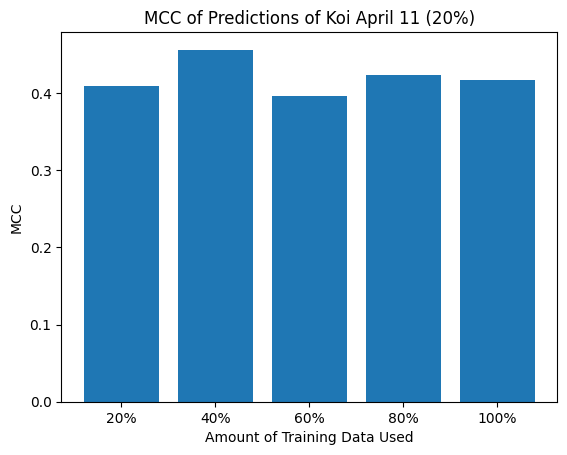

In [251]:
x = ['20%', '40%', '60%', '80%', '100%']
plt.bar(x, mccs20_1_1)
plt.title("MCC of Predictions of Koi April 11 (20%)")
plt.xlabel("Amount of Training Data Used")
plt.ylabel("MCC")
plt.xticks(x)
plt.show()

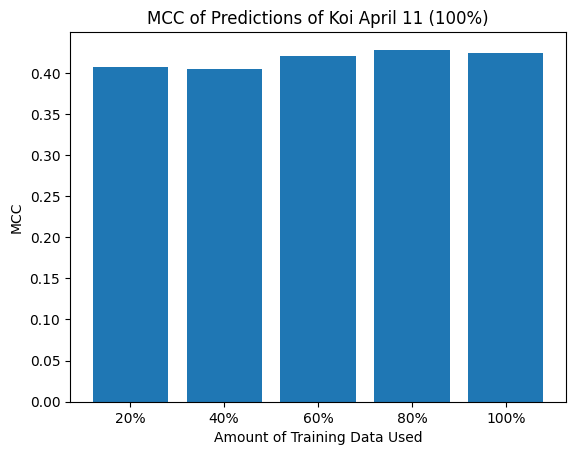

In [252]:
x = ['20%', '40%', '60%', '80%', '100%']
plt.bar(x, mccs100_1_1)
plt.title("MCC of Predictions of Koi April 11 (100%)")
plt.xlabel("Amount of Training Data Used")
plt.ylabel("MCC")
plt.xticks(x)
plt.show()

#### HIDE FIRST

In [ ]:
'''
def pool_and_take_out(processed_animal_data, processed_animal_labels, train_names, test_names, train_size=None, test_size=0.2):
    
    if test_size > 1 or test_size < 0:
        raise ValueError("Test size must be between 0 to 1")
    if train_size > 1 or train_size < 0:
        raise ValueError("Train size must be between 0 to 1")
    if train_size == None:
        train_size = 1 - test_size
    
    all_train_data_1_1 = np.empty((0,51))
    all_train_labels_1_1 = []
    all_test_data_1_1 = np.empty((0,51))
    all_test_labels_1_1 = []

    for name in train_names:
        all_train_data_1_1 = np.concatenate((all_train_data_1_1, processed_animal_data[name]))
        all_train_labels_1_1 = np.concatenate((all_train_labels_1_1, processed_animal_labels[name]))
    for name in test_names:
        all_test_data_1_1 = np.concatenate((all_train_data_1_1, processed_animal_data[name]))
        all_test_labels_1_1 = np.concatenate((all_train_labels_1_1, processed_animal_labels[name]))

    
    all_train_data_and_labels = np.column_stack((all_train_data_1_1, all_train_labels_1_1))
    all_test_data_and_labels = np.column_stack((all_test_data_1_1, all_test_labels_1_1))
    
    rng = np.random.default_rng()

    combined_train_data_1_1 = []
    combined_train_labels_1_1 = []
    combined_test_data_1_1 = []
    combined_test_labels_1_1 = []
    #print(all_train_data_and_labels)
    train_percent = int(len(all_train_data_and_labels) * train_size)
    test_percent = int(len(all_test_data_and_labels) * test_size)

    sampled_train = rng.choice(all_train_data_and_labels, size=train_percent, replace=False).astype(int)
    sampled_test = rng.choice(all_test_data_and_labels, size=test_percent, replace=False).astype(int)
    

    sampled_train_data = sampled_train[:, :-1]
    sampled_train_labels = sampled_train[:, -1]
    sampled_test_data = sampled_test[:, :-1]
    sampled_test_labels = sampled_test[:, -1]

    return sampled_train_data, sampled_test_data, sampled_train_labels, sampled_test_labels
'''

In [ ]:
'''
all = [all_train_data_and_labels, all_test_data_and_labels]
res = [[combined_train_data_1_1, combined_train_labels_1_1], [combined_test_data_1_1, combined_test_labels_1_1]]
    
for i, each in list(enumerate(all)): # i = 0 -> train, i = 1 -> test
        sampled_data = []
        store = res[i]
        for per in [0.2, 0.4, 0.6, 0.8, 1]:
            x_percent = int(len(each) * per)
    
    # Randomly select 20% of the data
            sampled_all_x = rng.choice(each, size=x_percent, replace=False)

            sampled_data_x = sampled_all_x[:, :-1]
            sampled_label_x = sampled_all_x[:, -1]

            store[0][f'{per*100}%'] = sampled_data_x
            store[1][f'{per*100}%'] = sampled_label_x
    
    return res
'''

In [97]:
def pool_and_take_out(data):
    # Calculate 20% of the total data length
    twenty_percent = int(len(data) * 0.20)
    fourty_percent = int(len(data) * 0.40)
    sixty_percent = int(len(data) * 0.60)
    eighty_percent = int(len(data) * 0.80)
    one_hundert_percent = len(data)
    
    # Randomly select 20% of the data
    sampled_data_20 = np.random.choice(data.shape[0], size=twenty_percent, replace=False)
    sampled_data_40 = np.random.choice(data.shape[0], size=fourty_percent, replace=False)
    sampled_data_60 = np.random.choice(data.shape[0], size=sixty_percent, replace=False)
    sampled_data_80 = np.random.choice(data.shape[0], size=eighty_percent, replace=False)
    sampled_data_100 = np.random.choice(data.shape[0], size=one_hundert_percent, replace=False)
    
    # Pool the remaining data
    sampled_data = [sampled_data_20, sampled_data_40, sampled_data_60, sampled_data_80, sampled_data_100]
    
    return sampled_data

In [98]:
taken_out = pool_and_take_out(temp)
print("Taken out data (20%):", taken_out)

Taken out data (20%): [array([73096, 13760, 29222, ..., 35567, 45133, 39220]), array([37273, 19991, 77341, ..., 39484, 72439,  7955]), array([56236, 58508, 59804, ..., 59970, 67834, 13023]), array([23246, 13630, 36162, ..., 63960, 28102, 30919]), array([76850,  8104, 63894, ..., 78254, 67084, 38515])]


In [112]:
len(taken_out[0])

16559

### 1.2 SANITY CHECK PLS PLS

In [253]:
combined_train_1_2 = ['koi_apr11', "koi_apr17", "koi_apr25", "koi_apr25_3"]
test_1_2 = ["koi_apr25_4", "koi_apr25_6"]
test_names_1_2 = ['20per_1_1', '100per_1_1']
train_names_1_2 = ["20_1_1", "40_1_1", "60_1_1", "80_1_1", "100_1_1"]
test_sizes_1_2 = [0.2, 0.99999999]
train_sizes_1_2 = [0.2, 0.4, 0.6, 0.8, 0.99999999]
#test_length_1_1 = np.array(test_sizes_1_1) * len(processed_koi_data['koi_apr11'])
#train_length_1_1 = np.array(train_sizes_1_1) * len(all_train_data)
#test_length_1_2 = test_length_1_2.astype(int)
#train_length_1_2 = train_length_1_2.astype(int)
clf = RandomForestClassifier(class_weight="balanced_subsample")

results_1_2 = []

for i in range(5):
    results_1_2.append({})
    for j in range(2):
        results_1_2[i][test_names_1_2[j]] = []
        training_data, test_data, training_labels, test_labels = pool_and_take_out(processed_koi_data, processed_koi_labels, train_names=combined_train_1_2, test_names=test_1_2, test_size=test_sizes_1_2[j] ,train_size=train_sizes_1_2[i])
        clf.fit(training_data, training_labels)
        print((i, j))
        results_1_2[i][test_names_1_2[j]].append(mc.test_classify(clf, test_data, test_labels))

Length of sampled_train is 15252 and Length of sampled_test is 846
(0, 0)
Length of sampled_train is 15252 and Length of sampled_test is 4230
(0, 1)
Length of sampled_train is 30504 and Length of sampled_test is 846
(1, 0)
Length of sampled_train is 30504 and Length of sampled_test is 4230
(1, 1)
Length of sampled_train is 45756 and Length of sampled_test is 846
(2, 0)
Length of sampled_train is 45756 and Length of sampled_test is 4230
(2, 1)
Length of sampled_train is 61008 and Length of sampled_test is 846
(3, 0)
Length of sampled_train is 61008 and Length of sampled_test is 4230
(3, 1)
Length of sampled_train is 76259 and Length of sampled_test is 846
(4, 0)
Length of sampled_train is 76259 and Length of sampled_test is 4230
(4, 1)


In [254]:
mccs20_1_2 = []
mccs100_1_2 = []
oddeven = 1

for set in results_1_2:
    for trial in set.values():
        trial = trial[0]
        if oddeven == 1:
            mccs20_1_2.append(trial["mcc"])
            oddeven -= 1
        elif oddeven == 0:
            mccs100_1_2.append(trial["mcc"])
            oddeven += 1

avg_mcc20_1_2 = np.mean(mccs20_1_2)
avg_mcc100_1_2 = np.mean(mccs100_1_2)
var_mcc20_1_2 = np.var(mccs20_1_2)
var_mcc100_1_2 = np.var(mccs100_1_2)
print(f'The Average and the Variance of 20% Koi_Apr11 is {avg_mcc20_1_2} and {var_mcc20_1_2} respectively.')
print(f'The Average and the Variance of 100% Koi_Apr11 is {avg_mcc100_1_2} and {var_mcc100_1_2} respectively.')

# avg_mcc_1_1 = np.mean(mccs_1_1)
# variance_1_1 = np.var(mccs_1_1)

The Average and the Variance of 20% Koi_Apr11 is 0.2098347894872319 and 0.0033547315281379107 respectively.
The Average and the Variance of 100% Koi_Apr11 is 0.23022553871691506 and 0.00039875378627720346 respectively.


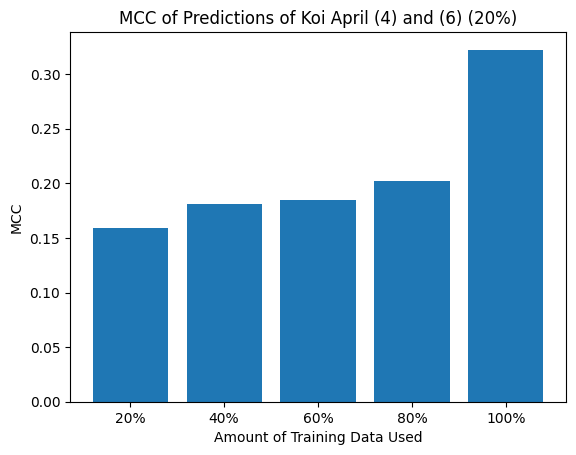

In [258]:
x = ['20%', '40%', '60%', '80%', '100%']
plt.bar(x, mccs20_1_2)
plt.title("MCC of Predictions of Koi April (4) and (6) (20%)")
plt.xlabel("Amount of Training Data Used")
plt.ylabel("MCC")
plt.xticks(x)
plt.show()

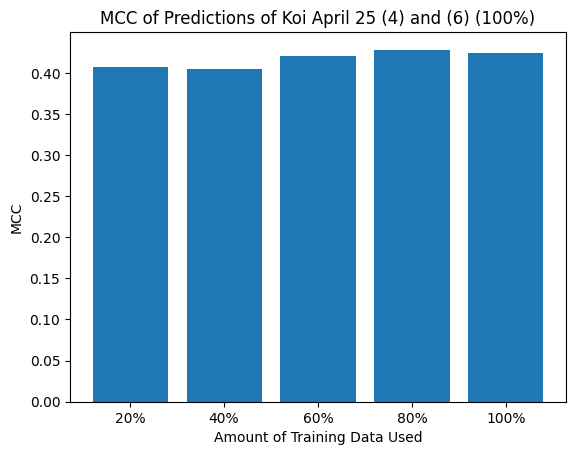

In [257]:
x = ['20%', '40%', '60%', '80%', '100%']
plt.bar(x, mccs100_1_1)
plt.title("MCC of Predictions of Koi April 25 (4) and (6) (100%)")
plt.xlabel("Amount of Training Data Used")
plt.ylabel("MCC")
plt.xticks(x)
plt.show()

### 1.3 Denial. Do Apr11 on Apr11...

## 2. Test on Boba, Train on Koi

### 2.1 Test on Best Boba (Apr25_2)

In [129]:
len(processed_boba_labels['boba_apr25_2'])

4253

In [130]:
for i in processed_boba_data.values():
    print(len(i))

21229
18004
19922
21229
4253


In [238]:
combined_train_2_1= ["koi_apr11", "koi_apr17", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_6"]
test_2_1 = ['boba_apr25_2']
test_names_2_1 = ['20per_2_1', '100per_2_1']
train_names_2_1 = ["20_2_1", "40_2_1", "60_2_1", "80_2_1", "100_2_1"]
test_sizes_2_1 = [0.2, 0.99999999]
train_sizes_2_1 = [0.2, 0.4, 0.6, 0.8, 0.99999999]
#test_length_1_1 = np.array(test_sizes_1_1) * len(processed_koi_data['koi_apr11'])
#train_length_1_1 = np.array(train_sizes_1_1) * len(all_train_data)
test_length_2_1 = test_length_2_1.astype(int)
train_length_2_1 = train_length_2_1.astype(int)
clf = RandomForestClassifier(class_weight="balanced_subsample")

results_2_1 = []

for i in range(5):
    results_2_1.append({})
    for j in range(2):
        results_2_1[i][test_names_2_1[j]] = []
        training_data, test_data, training_labels, test_labels = pool_and_take_out(processed_koi_data, processed_koi_labels, train_names=combined_train_2_1, test_names=test_2_1, test_size=test_sizes_2_1[j], train_size=train_sizes_2_1[i],processed_test_data=processed_boba_data, processed_test_labels=processed_boba_labels)
        clf.fit(training_data, training_labels)
        print((i, j))
        results_2_1[i][test_names_2_1[j]].append(mc.test_classify(clf, test_data, test_labels))

Length of sampled_train is 16098 and Length of sampled_test is 850
(0, 0)
Length of sampled_train is 16098 and Length of sampled_test is 4252
(0, 1)
Length of sampled_train is 32196 and Length of sampled_test is 850
(1, 0)
Length of sampled_train is 32196 and Length of sampled_test is 4252
(1, 1)
Length of sampled_train is 48294 and Length of sampled_test is 850
(2, 0)
Length of sampled_train is 48294 and Length of sampled_test is 4252
(2, 1)
Length of sampled_train is 64392 and Length of sampled_test is 850
(3, 0)
Length of sampled_train is 64392 and Length of sampled_test is 4252
(3, 1)
Length of sampled_train is 80490 and Length of sampled_test is 850
(4, 0)
Length of sampled_train is 80490 and Length of sampled_test is 4252
(4, 1)


In [239]:
# results_2_1

In [240]:
mccs20_2_1 = []
mccs100_2_1 = []
oddeven = 1

for set in results_2_1:
    for trial in set.values():
        trial = trial[0]
        if oddeven == 1:
            mccs20_2_1.append(trial["mcc"])
            oddeven -= 1
        elif oddeven == 0:
            mccs100_2_1.append(trial["mcc"])
            oddeven += 1

avg_mcc20_2_1 = np.mean(mccs20_2_1)
avg_mcc100_2_1 = np.mean(mccs100_2_1)
var_mcc20_2_1 = np.var(mccs20_2_1)
var_mcc100_2_1 = np.var(mccs100_2_1)
print(f'The Average and the Variance of 20% Boba_Apr25_2 is {avg_mcc20_2_1} and {var_mcc20_2_1} respectively.')
print(f'The Average and the Variance of 100% Boba_Apr25_2 {avg_mcc100_2_1} and {var_mcc100_2_1} respectively.')

# avg_mcc_1_1 = np.mean(mccs_1_1)
# variance_1_1 = np.var(mccs_1_1)

The Average and the Variance of 20% Boba_Apr25_2 is 0.11535493988424132 and 0.0021125906112220523 respectively.
The Average and the Variance of 100% Boba_Apr25_2 0.1635182275956563 and 0.0002596622384657131 respectively.


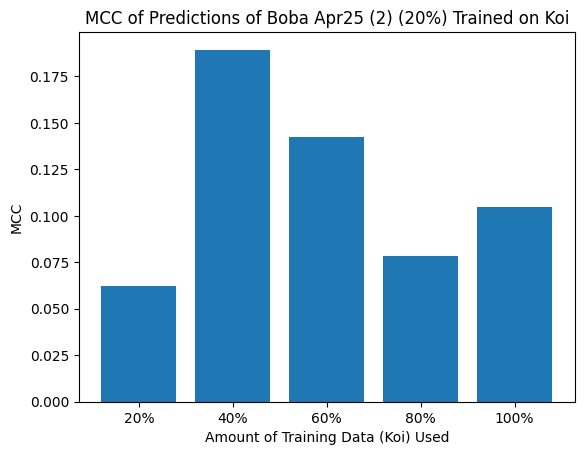

In [241]:
x = ['20%', '40%', '60%', '80%', '100%']
plt.bar(x, mccs20_2_1)
plt.title("MCC of Predictions of Boba Apr25 (2) (20%) Trained on Koi")
plt.xlabel("Amount of Training Data (Koi) Used")
plt.ylabel("MCC")
plt.xticks(x)
plt.show()

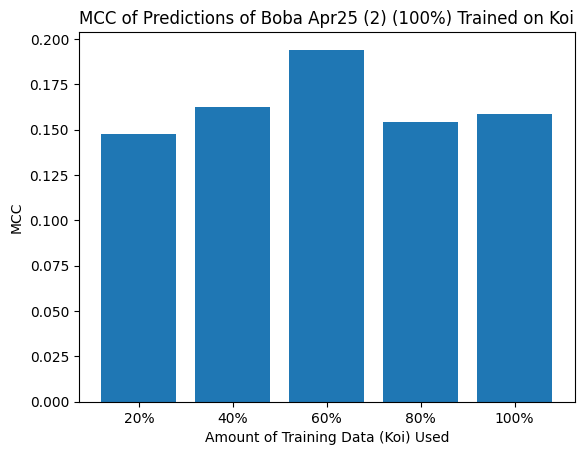

In [242]:
x = ['20%', '40%', '60%', '80%', '100%']
plt.bar(x, mccs100_2_1)
plt.title("MCC of Predictions of Boba Apr25 (2) (100%) Trained on Koi")
plt.xlabel("Amount of Training Data (Koi) Used")
plt.ylabel("MCC")
plt.xticks(x)
plt.show()

### 2.2 Test on All of Boba

In [224]:
combined_train_2_2= ["koi_apr11", "koi_apr17", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_6"]
test_2_2 = ["boba_apr11", "boba_apr21", "boba_apr21_2", "boba_apr25", "boba_apr25_2"]
test_names_2_2 = ['20per_2_2', '100per_2_2']
train_names_2_2 = ["20_2_2", "40_2_2", "60_2_2", "80_2_2", "100_2_2"]
test_sizes_2_2 = [0.2, 0.99999999]
train_sizes_2_2 = [0.2, 0.4, 0.6, 0.8, 0.99999999]
#test_length_1_1 = np.array(test_sizes_1_1) * len(processed_koi_data['koi_apr11'])
#train_length_1_1 = np.array(train_sizes_1_1) * len(all_train_data)
test_length_2_2 = test_length_2_2.astype(int)
train_length_2_2 = train_length_2_2.astype(int)
clf = RandomForestClassifier(class_weight="balanced_subsample")

results_2_2 = []

for i in range(5):
    results_2_2.append({})
    for j in range(2):
        results_2_2[i][test_names_2_2[j]] = []
        training_data, test_data, training_labels, test_labels = pool_and_take_out(processed_koi_data, processed_koi_labels, train_names=combined_train_2_2, test_names=test_2_2, test_size=test_sizes_2_2[j], train_size=train_sizes_2_2[i],processed_test_data=processed_boba_data, processed_test_labels=processed_boba_labels)
        clf.fit(training_data, training_labels)
        print((i, j))
        results_2_2[i][test_names_2_2[j]].append(mc.test_classify(clf, test_data, test_labels))

Length of sampled_train is 16098 and Length of sampled_test is 16927
(0, 0)
Length of sampled_train is 16098 and Length of sampled_test is 84636
(0, 1)
Length of sampled_train is 32196 and Length of sampled_test is 16927
(1, 0)
Length of sampled_train is 32196 and Length of sampled_test is 84636
(1, 1)
Length of sampled_train is 48294 and Length of sampled_test is 16927
(2, 0)
Length of sampled_train is 48294 and Length of sampled_test is 84636
(2, 1)
Length of sampled_train is 64392 and Length of sampled_test is 16927
(3, 0)
Length of sampled_train is 64392 and Length of sampled_test is 84636
(3, 1)
Length of sampled_train is 80490 and Length of sampled_test is 16927
(4, 0)
Length of sampled_train is 80490 and Length of sampled_test is 84636
(4, 1)


In [225]:
mccs20_2_2 = []
mccs100_2_2 = []
oddeven = 1

for set in results_2_2:
    for trial in set.values():
        trial = trial[0]
        if oddeven == 1:
            mccs20_2_2.append(trial["mcc"])
            oddeven -= 1
        elif oddeven == 0:
            mccs100_2_2.append(trial["mcc"])
            oddeven += 1

avg_mcc20_2_2 = np.mean(mccs20_2_2)
avg_mcc100_2_2 = np.mean(mccs100_2_2)
var_mcc20_2_2 = np.var(mccs20_2_2)
var_mcc100_2_2 = np.var(mccs100_2_2)
print(f'The Average and the Variance of 20% Boba is {avg_mcc20_2_2} and {var_mcc20_2_2} respectively.')
print(f'The Average and the Variance of 100% Boba is {avg_mcc100_2_2} and {var_mcc100_2_2} respectively.')

# avg_mcc_1_1 = np.mean(mccs_1_1)
# variance_1_1 = np.var(mccs_1_1)

The Average and the Variance of 20% Boba is 0.04367446058359846 and 7.071883551123137e-06 respectively.
The Average and the Variance of 100% Boba is 0.042848198256435724 and 6.1545668934723915e-06 respectively.


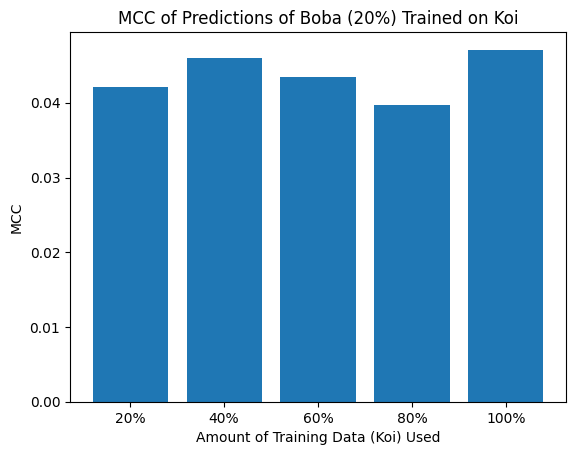

In [226]:
x = ['20%', '40%', '60%', '80%', '100%']
plt.bar(x, mccs20_2_2)
plt.title("MCC of Predictions of Boba (20%) Trained on Koi")
plt.xlabel("Amount of Training Data (Koi) Used")
plt.ylabel("MCC")
plt.xticks(x)
plt.show()

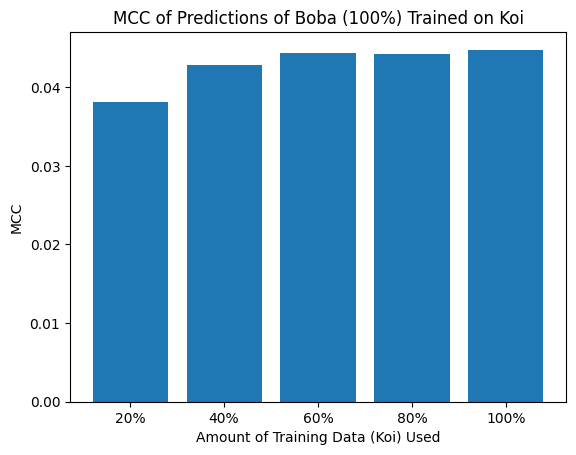

In [227]:
x = ['20%', '40%', '60%', '80%', '100%']
plt.bar(x, mccs100_2_2)
plt.title("MCC of Predictions of Boba (100%) Trained on Koi")
plt.xlabel("Amount of Training Data (Koi) Used")
plt.ylabel("MCC")
plt.xticks(x)
plt.show()

### 2.3 Sanity Check because I am not 

In [219]:
combined_train_2_3= ["koi_apr11"]
test_2_3 = ["boba_apr11"]
test_names_2_3 = ['20per_2_3', '100per_2_3']
train_names_2_3 = ["20_2_3", "40_2_3", "60_2_3", "80_2_3", "100_2_3"]
test_sizes_2_3 = [0.2, 0.99999999]
train_sizes_2_3 = [0.2, 0.4, 0.6, 0.8, 0.99999999]
#test_length_1_1 = np.array(test_sizes_1_1) * len(processed_koi_data['koi_apr11'])
#train_length_1_1 = np.array(train_sizes_1_1) * len(all_train_data)
#test_length_2_3 = test_length_2_3.astype(int)
#train_length_2_3 = train_length_2_3.astype(int)
clf = RandomForestClassifier(class_weight="balanced_subsample")

results_2_3 = []

for i in range(5):
    results_2_3.append({})
    for j in range(2):
        results_2_3[i][test_names_2_3[j]] = []
        training_data, test_data, training_labels, test_labels = pool_and_take_out(processed_koi_data, processed_koi_labels, train_names=combined_train_2_3, test_names=test_2_3, test_size=test_sizes_2_3[j], train_size=train_sizes_2_3[i], processed_test_data=processed_boba_data, processed_test_labels=processed_boba_labels)
        clf.fit(training_data, training_labels)
        print(((i,j), len(test_data)))
        results_2_3[i][test_names_2_3[j]].append(mc.test_classify(clf, test_data, test_labels))

Length of sampled_train is 3785 and Length of sampled_test is 4245
((0, 0), 4245)
Length of sampled_train is 3785 and Length of sampled_test is 21228
((0, 1), 21228)
Length of sampled_train is 7570 and Length of sampled_test is 4245
((1, 0), 4245)
Length of sampled_train is 7570 and Length of sampled_test is 21228
((1, 1), 21228)
Length of sampled_train is 11355 and Length of sampled_test is 4245
((2, 0), 4245)
Length of sampled_train is 11355 and Length of sampled_test is 21228
((2, 1), 21228)
Length of sampled_train is 15140 and Length of sampled_test is 4245
((3, 0), 4245)
Length of sampled_train is 15140 and Length of sampled_test is 21228
((3, 1), 21228)
Length of sampled_train is 18924 and Length of sampled_test is 4245
((4, 0), 4245)
Length of sampled_train is 18924 and Length of sampled_test is 21228
((4, 1), 21228)


In [211]:
len(processed_boba_data["boba_apr11"]) + len(processed_koi_data["koi_apr11"])

40154

In [220]:
len(results_2_3[0]['20per_2_3'][0]['predictions'])

4245

In [221]:
mccs20_2_3 = []
mccs100_2_3 = []
oddeven = 1

for set in results_2_3:
    for trial in set.values():
        trial = trial[0]
        if oddeven == 1:
            mccs20_2_3.append(trial["mcc"])
            oddeven -= 1
        elif oddeven == 0:
            mccs100_2_3.append(trial["mcc"])
            oddeven += 1

avg_mcc20_2_3 = np.mean(mccs20_2_3)
avg_mcc100_2_3 = np.mean(mccs100_2_3)
var_mcc20_2_3 = np.var(mccs20_2_3)
var_mcc100_2_3 = np.var(mccs100_2_3)
print(f'The Average and the Variance of 20% Boba is {avg_mcc20_2_3} and {var_mcc20_2_3} respectively.')
print(f'The Average and the Variance of 100% Boba is {avg_mcc100_2_3} and {var_mcc100_2_3} respectively.')

# avg_mcc_1_1 = np.mean(mccs_1_1)
# variance_1_1 = np.var(mccs_1_1)

The Average and the Variance of 20% Boba is 0.02650980201041871 and 0.0003507981258052459 respectively.
The Average and the Variance of 100% Boba is 0.03053805807438285 and 1.8103691226169655e-05 respectively.


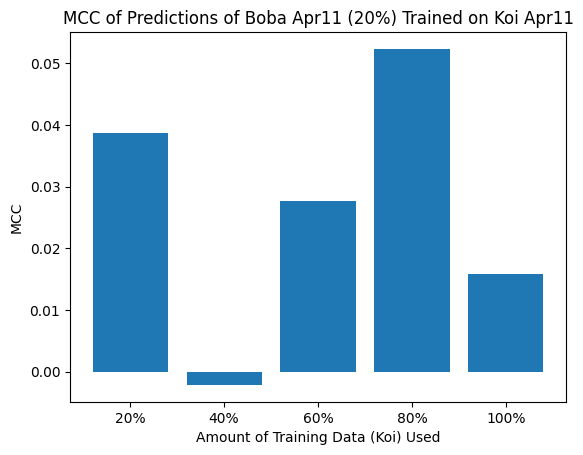

In [222]:
x = ['20%', '40%', '60%', '80%', '100%']
plt.bar(x, mccs20_2_3)
plt.title("MCC of Predictions of Boba Apr11 (20%) Trained on Koi Apr11")
plt.xlabel("Amount of Training Data (Koi) Used")
plt.ylabel("MCC")
plt.xticks(x)
plt.show()

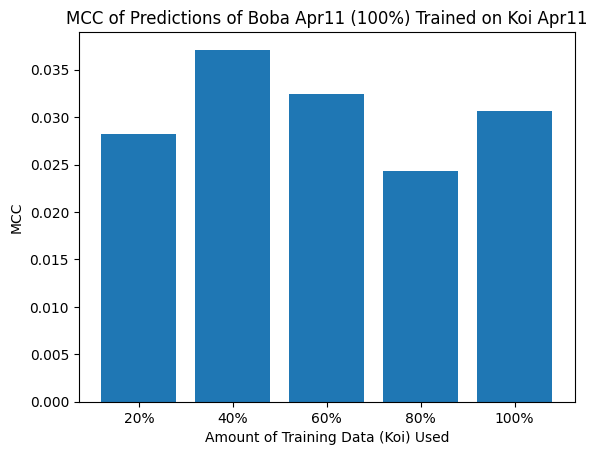

In [223]:
x = ['20%', '40%', '60%', '80%', '100%']
plt.bar(x, mccs100_2_3)
plt.title("MCC of Predictions of Boba Apr11 (100%) Trained on Koi Apr11")
plt.xlabel("Amount of Training Data (Koi) Used")
plt.ylabel("MCC")
plt.xticks(x)
plt.show()

### 2.4 TRAIN TEST SPLIT COMPARISON

In [208]:
combined_train_2_4= ["koi_apr11"]
test_2_4 = ["boba_apr11"]
res_2_4 = []

train_data, _, train_label, _ = train_test_split(processed_koi_data["koi_apr11"], processed_koi_labels["koi_apr11"], test_size = 0.2)
_, test_data, _, test_labels = train_test_split(processed_boba_data["boba_apr11"], processed_boba_labels["boba_apr11"], test_size = 0.2)
clf.fit(training_data, training_labels)
res_2_4.append(mc.test_classify(clf, test_data, test_labels))

In [206]:
res_2_4

[{'predictions': array([0, 0, 0, ..., 0, 0, 0]),
  'mcc': 0.028507626726265944,
  'f1': 0.20867379006913891,
  'accuracy': 0.703485633537447}]

In [195]:
len(res_2_4[0]["predictions"])

4246

In [203]:
len(processed_boba_data["boba_apr11"])/5

4245.8

In [204]:
len(processed_koi_data["koi_apr11"])/5

3785.0

In [205]:
len(processed_boba_data["boba_apr11"])/5 + len(processed_koi_data["koi_apr11"])/5

8030.8